In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
base_dir = '/content/drive/MyDrive/Sura'
train_path = f'{base_dir}/data/train'
test_path = f'{base_dir}/data/test'
model_path = f'{base_dir}/models/gender_model.h5'

In [47]:
import shutil
import os

drive_data_path = '/content/drive/MyDrive/Sura/data'
local_data_path = '/content/local_data/data'

if not os.path.exists(local_data_path):
    print("Copying data to local Colab storage (fast SSD)...")
    shutil.copytree(drive_data_path, local_data_path)
    print("✅ Copy complete!")
else:
    print("✅ Local data already exists. Skipping copy.")

train_path = f'{local_data_path}/train'
test_path = f'{local_data_path}/test'

print("Training Path:", train_path)
print("Testing Path:", test_path)

✅ Local data already exists. Skipping copy.
Training Path: /content/local_data/data/train
Testing Path: /content/local_data/data/test


In [35]:
!pip install -q tensorflow

In [36]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt

In [46]:
img_size = 160
batch_size = 32
num_classes = 2
epochs = 15

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 19296 images belonging to 2 classes.
Found 4822 images belonging to 2 classes.


In [38]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [39]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
outputs = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=outputs)

In [40]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [41]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6),
    ModelCheckpoint('mobilenetv2_gender.h5', save_best_only=True)
]

In [42]:
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=test_generator,
    callbacks=callbacks
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.7879 - loss: 0.4736

603/603 ━━━━━━━━━━━━━━━━━━━━ 228s 356ms/step - accuracy: 0.7880 - loss: 0.4735 - val_accuracy: 0.8550 - val_loss: 0.3374 - learning_rate: 0.0010
Epoch 2/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.8397 - loss: 0.3730

603/603 ━━━━━━━━━━━━━━━━━━━━ 192s 318ms/step - accuracy: 0.8397 - loss: 0.3730 - val_accuracy: 0.8577 - val_loss: 0.3280 - learning_rate: 0.0010
Epoch 3/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 203s 319ms/step - accuracy: 0.8448 - loss: 0.3584 - val_accuracy: 0.8521 - val_loss: 0.3367 - learning_rate: 0.0010
Epoch 4/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 192s 319ms/step - accuracy: 0.8409 - loss: 0.3640 - val_accuracy: 0.8592 - val_loss: 0.3301 - learning_rate: 0.0010
Epoch 5/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.8491 - loss: 0.3492

603/603 ━━━━━━━━━━━━━━━━━━━━ 190s 316ms/step - accuracy: 0.8491 - loss: 0.3492 - val_accuracy: 0.8567 - val_loss: 0.3238 - learning_rate: 2.0000e-04
Epoch 6/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 191s 317ms/step - accuracy: 0.8602 - loss: 0.3303 - val_accuracy: 0.8577 - val_loss: 0.3247 - learning_rate: 2.0000e-04
Epoch 7/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - accuracy: 0.8558 - loss: 0.3337

603/603 ━━━━━━━━━━━━━━━━━━━━ 192s 319ms/step - accuracy: 0.8558 - loss: 0.3337 - val_accuracy: 0.8567 - val_loss: 0.3216 - learning_rate: 2.0000e-04
Epoch 8/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 190s 315ms/step - accuracy: 0.8561 - loss: 0.3381 - val_accuracy: 0.8590 - val_loss: 0.3220 - learning_rate: 2.0000e-04
Epoch 9/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 192s 318ms/step - accuracy: 0.8495 - loss: 0.3454 - val_accuracy: 0.8561 - val_loss: 0.3226 - learning_rate: 2.0000e-04
Epoch 10/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.8521 - loss: 0.3400

603/603 ━━━━━━━━━━━━━━━━━━━━ 191s 317ms/step - accuracy: 0.8521 - loss: 0.3400 - val_accuracy: 0.8573 - val_loss: 0.3201 - learning_rate: 4.0000e-05
Epoch 11/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 188s 312ms/step - accuracy: 0.8555 - loss: 0.3298 - val_accuracy: 0.8567 - val_loss: 0.3210 - learning_rate: 4.0000e-05
Epoch 12/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 189s 314ms/step - accuracy: 0.8552 - loss: 0.3337 - val_accuracy: 0.8557 - val_loss: 0.3230 - learning_rate: 4.0000e-05
Epoch 13/15
603/603 ━━━━━━━━━━━━━━━━━━━━ 188s 311ms/step - accuracy: 0.8536 - loss: 0.3322 - val_accuracy: 0.8561 - val_loss: 0.3215 - learning_rate: 8.0000e-06


In [43]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc:.2%}, Test loss: {test_loss:.4f}')

151/151 ━━━━━━━━━━━━━━━━━━━━ 18s 119ms/step - accuracy: 0.8412 - loss: 0.3410
Test accuracy: 85.73%, Test loss: 0.3201


In [51]:
model_dir = os.path.join(base_dir, "models")
os.makedirs(model_dir, exist_ok=True)

model.save(f"{model_dir}/gender_classifier.keras")

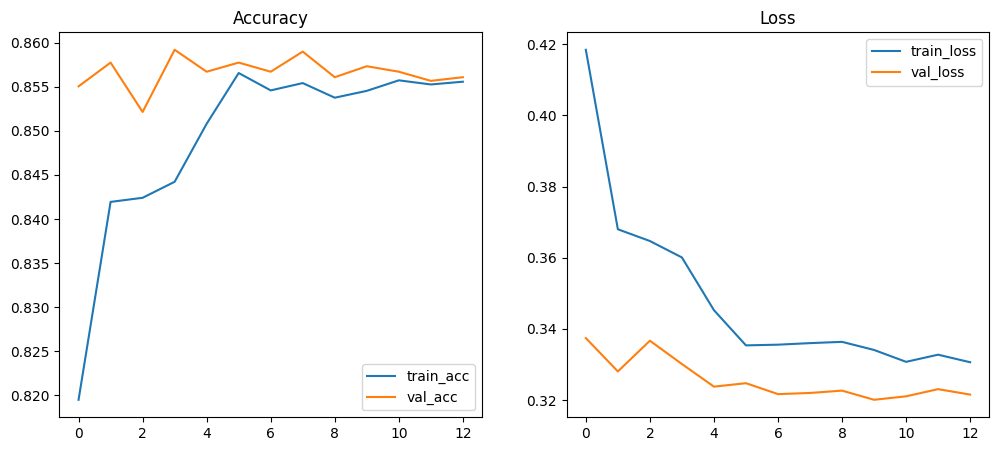

In [45]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title('Loss')

plt.show()